In [1]:
#!pip install pandas-datareader
# !pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [3]:
start="2010-01-01"
end="2019-12-31"

df = pdr.get_data_yahoo("AAPL", start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355125,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421059,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798424,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.771545,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.191589,144114400


In [5]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [6]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


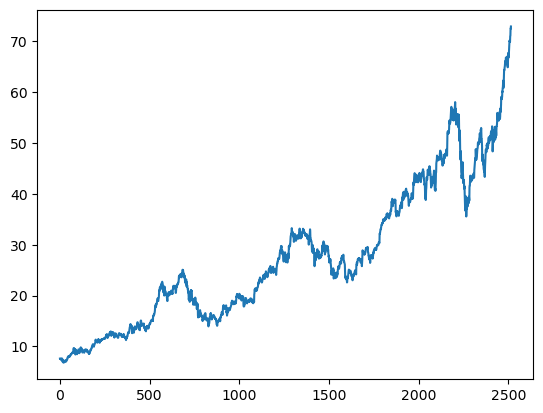

In [7]:
plt.plot(df.Close)

In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

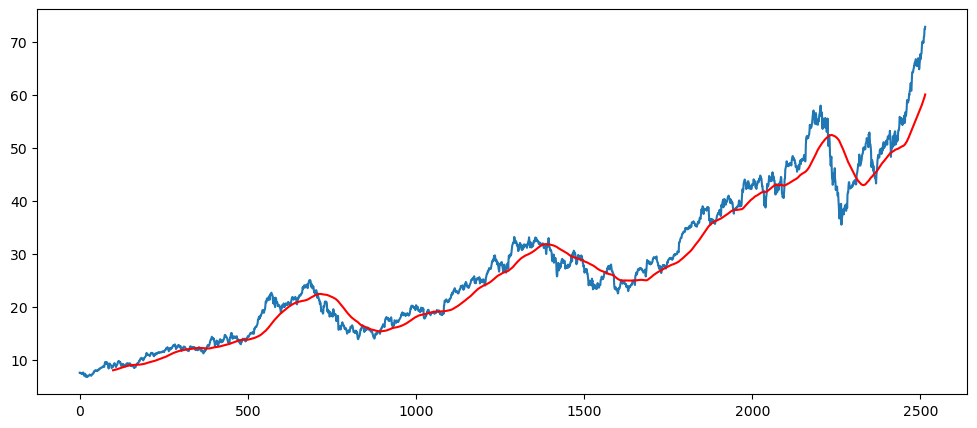

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

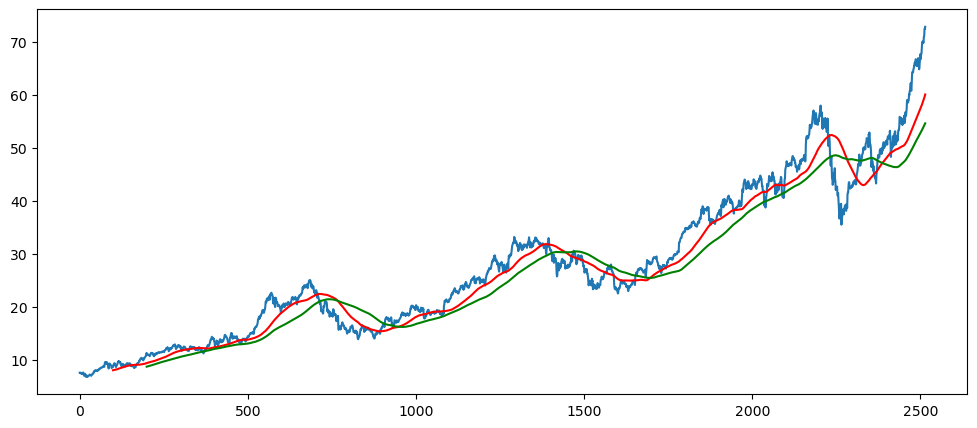

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
## Spliting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.75)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.75):int(len(df))])

data_testing.shape,data_training.shape

((629, 1), (1886, 1))

In [13]:
data_testing.head()

,Close
1886,36.005001
1887,35.875000
1888,36.022499
1889,35.682499
1890,36.044998


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02438237],
       [0.02479319],
       [0.02100704],
       ...,
       [0.90385825],
       [0.92017984],
       [0.90346961]])

In [16]:
X_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
X_train , y_train=np.array(X_train),np.array(y_train)

In [17]:
# ML MODEL


In [18]:
from  keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences= True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [37]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',

    
)

In [38]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=2,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [39]:
model.fit(X_train,y_train,
          verbose=1,
          epochs=50,
          callbacks=early_stopping,
          validation_split=0.1
     )

Epoch 1/50
51/51 [==============================] - 23s 303ms/step - loss: 0.0037 - val_loss: 0.0090
Epoch 2/50
51/51 [==============================] - 16s 311ms/step - loss: 0.0035 - val_loss: 0.0088
Epoch 3/50
51/51 [==============================] - 16s 307ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 4/50
51/51 [==============================] - 17s 342ms/step - loss: 0.0028 - val_loss: 0.0053
Epoch 5/50
51/51 [==============================] - 19s 374ms/step - loss: 0.0026 - val_loss: 0.0047
Epoch 5: early stopping


In [40]:
model.save("keras_model.h5")

In [42]:
past_100_days=data_training.tail(100)
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13804\674358354.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [43]:
final_df.head()

,Close
0,32.882500
1,33.009998
2,33.105000
3,33.029999
4,33.322498


In [44]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.00318767],
       [0.00556284],
       [0.00368771],
       [0.01100065],
       [0.0218139 ],
       [0.02487653],
       [0.02387654],
       [0.02618915],
       [0.03231451],
       [0.03487719],
       [0.03125196],
       [0.03206454],
       [0.03375207],
       [0.03412718],
       [0.0516282 ],
       [0.04644045],
       [0.05156573],
       [0.04881554],
       [0.04994066],
       [0.04669043],
       [0.04469026],
       [0.04756548],
       [0.04794049],
       [0.04662796],
       [0.05581604],
       [0.0572536 ],
       [0.05287835],
       [0.06206643],
       [0.05194073],
       [0.06181636],
       [0.05869117],
       [0.05694107],
       [0.05844119],
       [0.07669232],
       [0.0786924 ],
       [0.07750481],
       [0.07581727],
       [0.07606725],
       [0.08275521],
       [0.07806742],
       [0.07581727],
       [0.0738171 ],
       [0.07275455],
       [0.06312899],
       [0.06419154],
       [0.05950375],
       [0.064

In [45]:
input_data.shape

(729, 1)

In [46]:
X_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [47]:
X_test,y_test=np.array(X_test),np.array(y_test)
X_test.shape,y_test.shape

((629, 100, 1), (629,))

In [48]:
# Making Prediction

y_pred=model.predict(X_test)
y_pred.shape

20/20 [==============================] - 3s 100ms/step


(629, 1)

In [49]:
scaler.scale_

array([0.02500156])

In [50]:
scale_factor=1/0.02500156
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

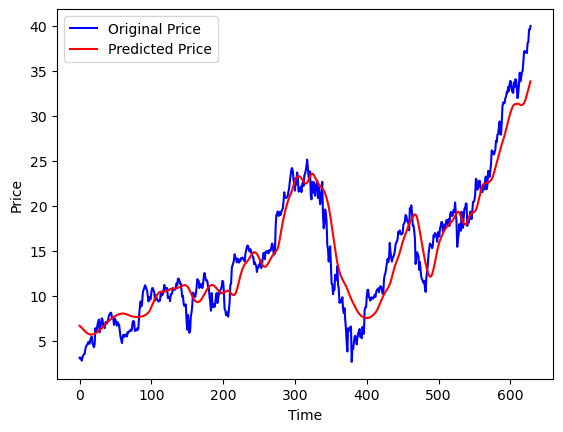

In [51]:
plt.plot(y_test,'b',label ='Original Price')
plt.plot(y_pred,'r',label ='Predicted Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()